1. Картинка на PCA
2. 3 алгоритма
3. Perfomance

In [49]:
import numpy as np
import csv
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [51]:
from sklearn import metrics

In [90]:
from scipy import stats

def conf_int(X, alfa=0.05):
  n=X.size-1
  t=stats.t(n)
  tcr=t.ppf(1-alfa/2)
  temp=tcr*np.std(X)/np.sqrt(n+1)
  return temp

# Gather Data

In [5]:
blood = []
with open("blood/transfusion.data", 'r') as fn:
  raw_blood = csv.reader(fn, delimiter = ',')
  for line in raw_blood:
    blood.append(line)

Immediately split it into train/test

In [6]:
b_labels = blood[0]
b_data = blood[1:]
b_target = np.array([i[-1] for i in b_data])
b_target = b_target.astype(np.float32)
b_data = np.array([i[:-1] for i in b_data])
b_data = b_data.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(
    b_data, b_target, test_size=0.1, random_state=0)

# Visualize data with PCA

In [7]:
pca = PCA(n_components=2)
X_r = pca.fit(b_data).transform(b_data)
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [  9.99801934e-01   1.70992789e-04]


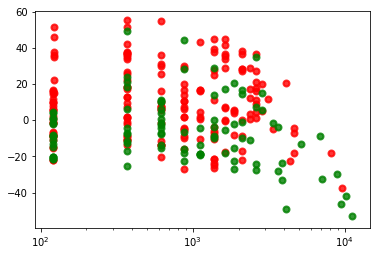

In [8]:
# Visualize
plt.figure()
plt.xscale('log')
colors = ['red', 'green']
lw = 2

for color, i, target_name in zip(colors, [0, 1], ["Yes", "No"]):
  plt.scatter(X_r[b_target == i, 0], X_r[b_target == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.show()

Here on graph green are those who applied.

# SVM Classifier

In [95]:
svm = SVC(kernel='rbf', C=1, probability=True).fit(X_train, y_train)
svm.score(X_test, y_test)

0.69333333333333336

In [97]:
cv_results = cross_validate(svm, X_train, y_train, return_train_score=False)
sorted(cv_results.keys()) 
print(cv_results['test_score'])
conf_int(cv_results['test_score'])

[ 0.77777778  0.74553571  0.77678571]


(0.74595140061314957, 0.78744807028632136)

In [59]:
print(roc_auc_score(y_test, svm.predict_proba(X_test)[:,1]))
print(roc_auc_score(y_train[:len(y_test)], svm.predict_proba(X_train[:len(y_test)])[:,1]))

0.7016
0.946504237288


In [60]:
svm.score(X_test, y_test)

0.69333333333333336

In [61]:
probs = svm.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

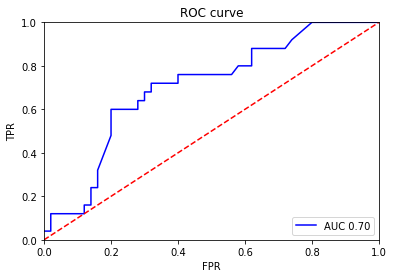

In [62]:
plt.figure()
plt.title('ROC curve')
plt.plot(fpr, tpr, 'b', label = "AUC %0.2f" % metrics.auc(fpr, tpr))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,15):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)
  print("n_neighbours = ", i, " score: ", neigh.score(X_test, y_test))
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train)

n_neighbours =  1  score:  0.613333333333
n_neighbours =  2  score:  0.72
n_neighbours =  3  score:  0.733333333333
n_neighbours =  4  score:  0.706666666667
n_neighbours =  5  score:  0.733333333333
n_neighbours =  6  score:  0.706666666667
n_neighbours =  7  score:  0.706666666667
n_neighbours =  8  score:  0.693333333333
n_neighbours =  9  score:  0.72
n_neighbours =  10  score:  0.693333333333
n_neighbours =  11  score:  0.72
n_neighbours =  12  score:  0.693333333333
n_neighbours =  13  score:  0.733333333333
n_neighbours =  14  score:  0.68


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

# Logistic Regression

In [64]:
from sklearn import linear_model

In [65]:
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

0.78157503714710252

In [71]:
v_results = cross_validate(logreg, X_train, y_train)
sorted(cv_results.keys())                         

print(cv_results['test_score'])
conf_int(cv_results['test_score'])

[ 0.77777778  0.74553571  0.77678571]


(0.7497587909957194, 0.78364067990375152)

In [77]:
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

In [79]:
print(roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))
print(roc_auc_score(y_train[:len(y_test)], logreg.predict_proba(X_train[:len(y_test)])[:,1]))

0.7816
0.770656779661


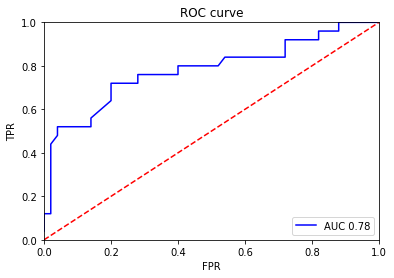

In [78]:
plt.figure()
plt.title('ROC curve')
plt.plot(fpr, tpr, 'b', label = "AUC %0.2f" % metrics.auc(fpr, tpr))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [84]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target


In [85]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='rbf', C=1).fit(X, y)

In [86]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

In [87]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

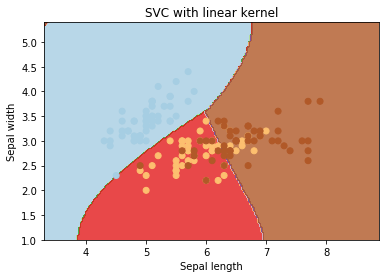

In [88]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [93]:
conf_int([2, 3, 5])

(1.604775810104468, 5.0618908565621989)